Handwritten digits classification using neural network


Handwritten digit recognition system not only detects scanned images of hand written digits. Hand written digit recoginition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of hand written digits.

In [1]:
#!pip install tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
streamlit 1.15.2 requires protobuf<4,>=3.12, but you have protobuf 4.24.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.
mysql-connector-python 8.0.30 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.24.2 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.22.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.22.0 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.22.0 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

C:\Users\SREERAG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 22s 2us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

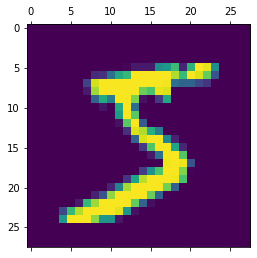

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255


In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4742 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3044 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9252


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9235


[0.2721012532711029, 0.9235000014305115]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.6479067e-02, 3.5141940e-07, 4.1862313e-02, 9.5302916e-01,
       3.6700778e-03, 1.1499851e-01, 2.6767439e-06, 9.9982989e-01,
       1.1208945e-01, 6.0892719e-01], dtype=float32)

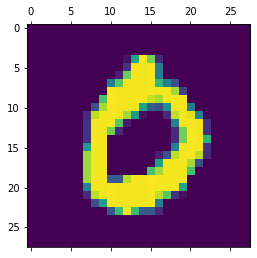

In [18]:
plt.matshow(X_test[3])

In [19]:
np.argmax(y_predicted[3])

0

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   8,   10,  910,   15,   10,    4,   13,   13,   47,    2],
       [   4,    0,   16,  910,    1,   34,    2,   10,   27,    6],
       [   2,    1,    3,    1,  925,    0,   11,    5,   11,   23],
       [  10,    2,    1,   27,   11,  786,   15,    5,   30,    5],
       [  11,    3,    3,    1,    7,   19,  909,    2,    3,    0],
       [   2,    5,   20,    6,   10,    1,    0,  960,    6,   18],
       [   6,    8,    5,   19,    9,   27,    8,   13,  876,    3],
       [  11,    7,    1,   11,   40,    9,    0,   34,    9,  887]])>

Text(69.0, 0.5, 'Truth')

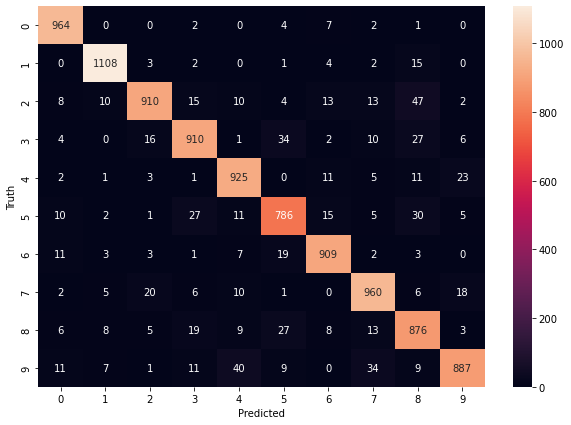

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
#using hidden layer

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2707 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1228 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9837


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9756


[0.07912787795066833, 0.975600004196167]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

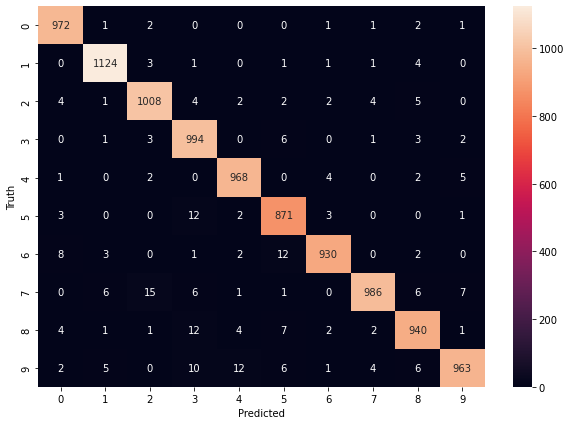

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#Using Flatten layer so that we don't have to call reshape on input dataset

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2713 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1241 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0653 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0338 - accuracy: 0.9900
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0231 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9781


[0.08145761489868164, 0.9781000018119812]